# Loading the dataset, dropping sepal features


In [20]:
from sklearn.datasets import load_iris
import pandas as pd

In [47]:
df = load_iris(as_frame = True)

In [48]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [49]:
df.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [50]:
df.data.drop(columns=['sepal length (cm)','sepal width (cm)'],inplace=True)

<ipython-input-50-fd1d8be8e4a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data.drop(columns=['sepal length (cm)','sepal width (cm)'],inplace=True)


In [51]:
df.data

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


#Plotting the graph

In [60]:
from matplotlib import pyplot as plt

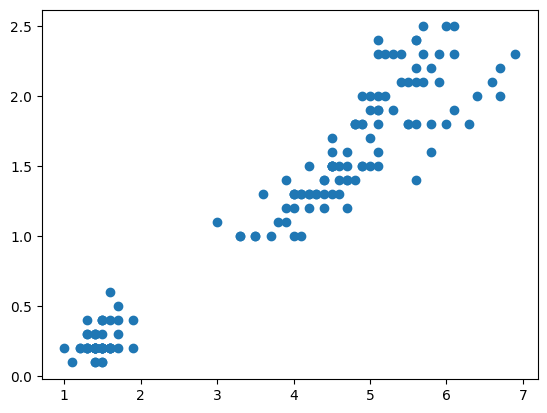

In [62]:
plt.scatter(df.data['petal length (cm)'],df.data['petal width (cm)'])

# Forming Clusters

In [54]:
from sklearn.cluster import KMeans

In [57]:
k_means = KMeans(n_clusters=3)

In [63]:
y_predicted = k_means.fit_predict(df.data[['petal length (cm)',"petal width (cm)"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [64]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [65]:
df.data['cluster'] = y_predicted

<ipython-input-65-cb0a62392519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data['cluster'] = y_predicted


In [66]:
df.data.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


#Viewing the different clusters

In [68]:
df1 = df.data[df.data.cluster==0]
df2 = df.data[df.data.cluster==1]
df3 = df.data[df.data.cluster==2]

In [71]:
k_means.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

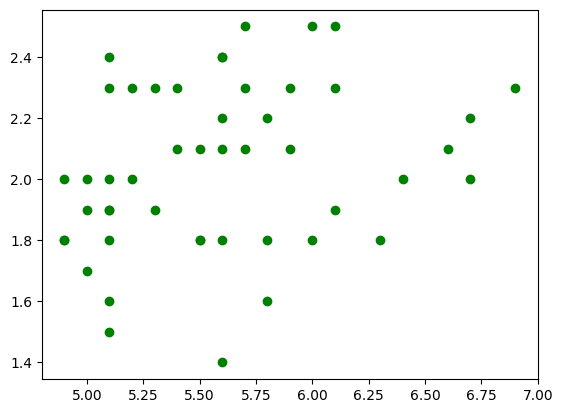

In [78]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')

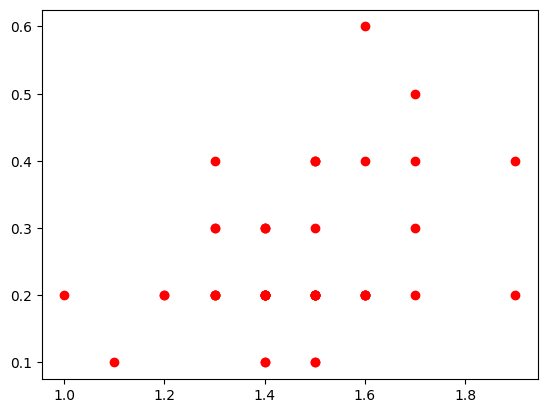

In [80]:
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')

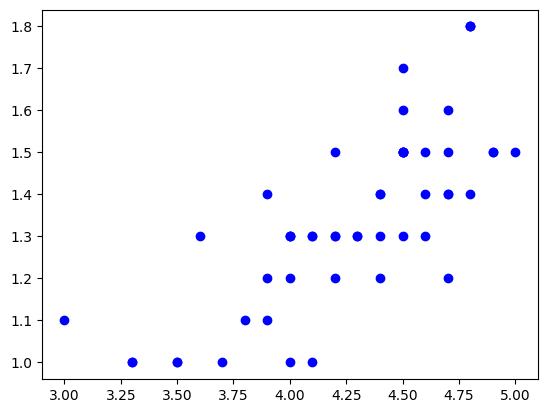

In [81]:
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')

#This is where they are on the original scatter

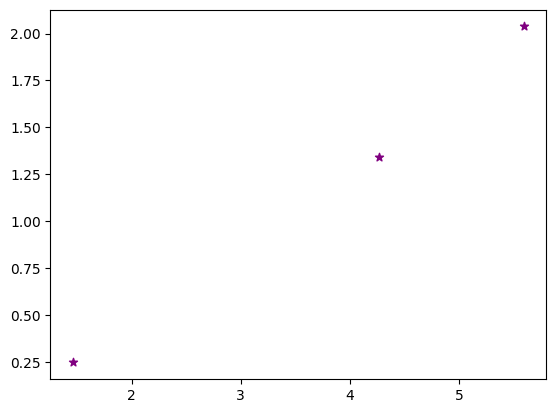

In [88]:
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],color='purple',marker='*',label='centroid');

#Elbow method to determine number of clusters

In [84]:
sse = []
k_range = range(1,10)
for k in k_range:
  km = KMeans(n_clusters = k)
  km.fit(df.data[['petal length (cm)','petal width (cm)']])
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

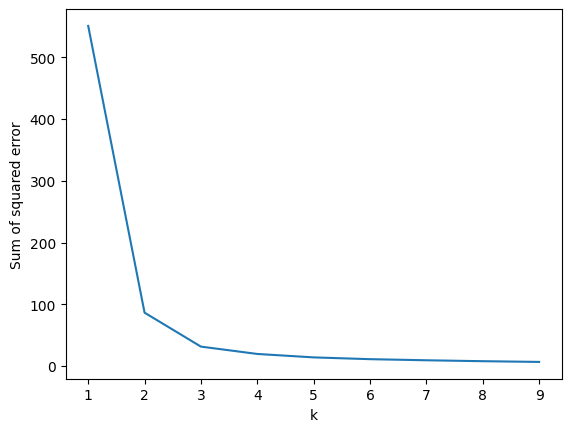

In [85]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

# After 3, the decrease in inertia starts to level off, so we should choose n_clusters=3